### 🔙 Volver al [Índice](./Indice_Tablas_Frecuencias.ipynb)

Se recopilaron datos de 500 estudiantes de preparatoria sobre el número de libros completos que leyeron durante un semestre. Esto ayudará a entender los hábitos de lectura y fomentar mejores estrategias educativas.
Los valores posibles varían entre 0 (no leyeron nada) y 20 libros (muy lectores).

### 1: Datos cuantitativos discretos 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración estética
plt.style.use('ggplot')

# Generar 500 datos aleatorios (número de libros leídos)
np.random.seed(42)  # Para reproducibilidad
datos = np.random.poisson(lam=5, size=500)  # Media ~5 libros
datos = np.clip(datos, 0, 20)  # Limitar a entre 0 y 20 libros

### 2: Tabla de frecuencias

In [2]:
# Crear tabla de frecuencias
tabla = pd.Series(datos).value_counts().sort_index()
frecuencia_absoluta = tabla
frecuencia_relativa = (tabla / tabla.sum()).round(4)
frecuencia_acumulada = frecuencia_relativa.cumsum()

# Mostrar tabla
tabla_frecuencias = pd.DataFrame({
    "Libros leídos": tabla.index,
    "Frecuencia Absoluta": frecuencia_absoluta.values,
    "Frecuencia Relativa": frecuencia_relativa.values,
    "Frecuencia Acumulada": frecuencia_acumulada.values
})

print("Tabla de Frecuencias")
display(tabla_frecuencias)

Tabla de Frecuencias


,Libros leídos,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada
0,0,3,0.006,0.006
1,1,23,0.046,0.052
2,2,47,0.094,0.146
3,3,66,0.132,0.278
4,4,82,0.164,0.442
5,5,87,0.174,0.616
6,6,66,0.132,0.748
7,7,51,0.102,0.850
8,8,43,0.086,0.936
9,9,14,0.028,0.964


### 3: Gráficos
#### 1. Histograma (frecuencia absoluta)
Esta gráfica muestra que la mayoría de las personas leen entre 4 y 6 libros. Hay una gran concentración de datos en este rango, y la frecuencia disminuye significativamente conforme se alejan de estos valores. Esto sugiere que en general las personas tienen un hábito moderado de lectura. También se observa que hay pocas personas que no leen libros, y aún menos que leen muchos (más de 9).

Conclusión:
El comportamiento lector típico del grupo analizado se encuentra entre 4 y 6 libros leídos, siendo valores extremos poco comunes.

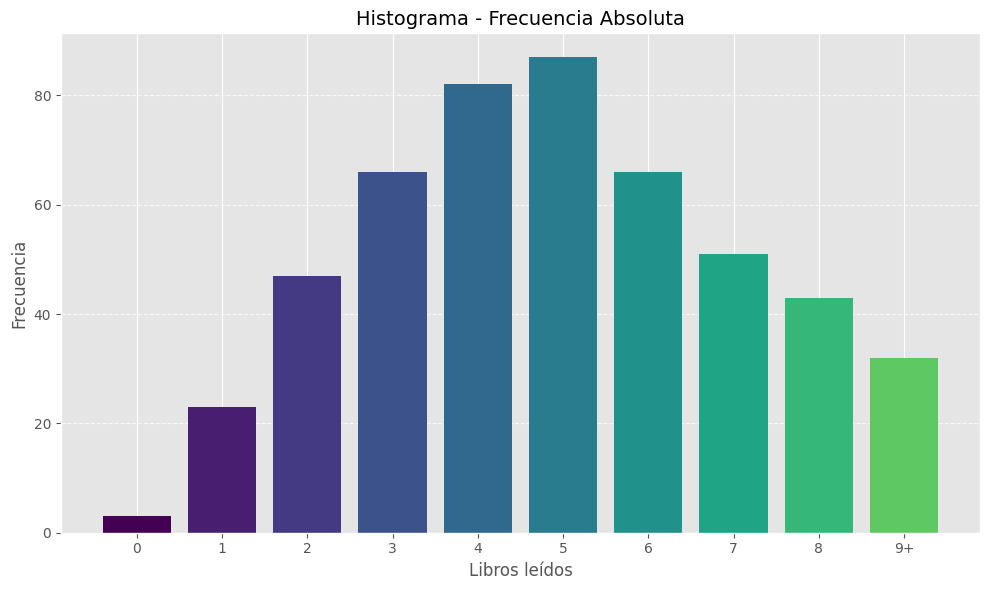

In [21]:
# Clasificación corregida: valores de 0 a 8 individuales, y de 9 a 20 agrupados como "9"
datos_clasificados = pd.Series(datos)
datos_clasificados = datos_clasificados.apply(lambda x: str(x) if x < 9 else "9+")

# Calcular frecuencias sin error de ordenación
frecuencia = datos_clasificados.value_counts()
frecuencia = frecuencia.reindex([str(i) for i in range(9)] + ["9+"], fill_value=0)

# Graficar el histograma corregido
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, frecuencia.values, color=plt.cm.viridis(np.linspace(0, 1, len(tabla))))
plt.title("Histograma - Frecuencia Absoluta", fontsize=14)
plt.xlabel("Libros leídos", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2. Diagrama de barras horizontales (frecuencia absoluta)

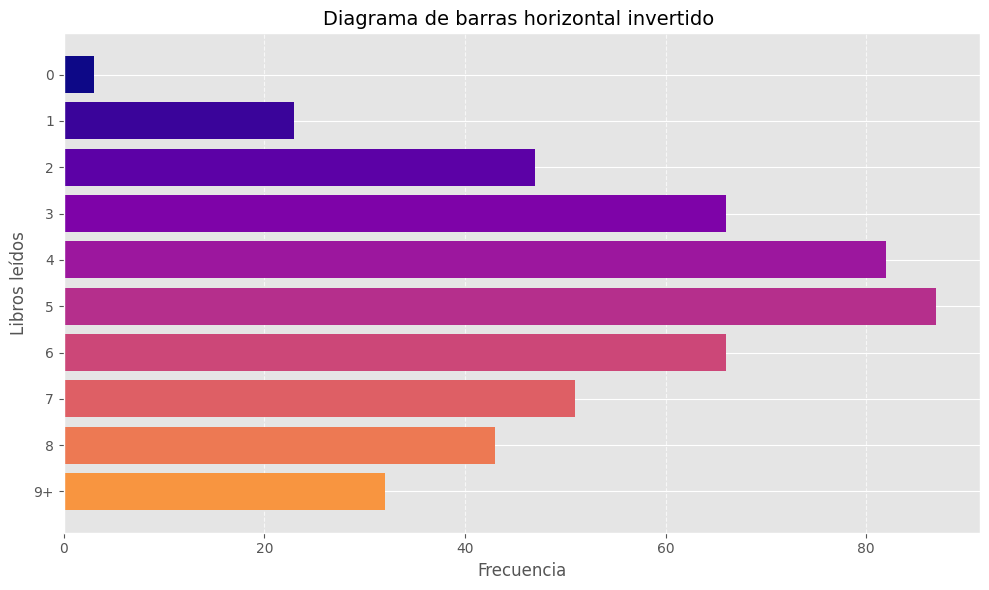

In [22]:
# Agrupación: 0 a 8 individualmente, 9 a 20 en "9+"
datos_clasificados = pd.Series(datos)
datos_clasificados = datos_clasificados.apply(lambda x: str(x) if x < 9 else "9+")

# Frecuencia por clase (orden explícito)
frecuencia = datos_clasificados.value_counts()
frecuencia = frecuencia.reindex([str(i) for i in range(9)] + ["9+"], fill_value=0)

# Diagrama de barras horizontal con el eje invertido
plt.figure(figsize=(10, 6))
plt.barh(frecuencia.index, frecuencia.values, color=plt.cm.plasma(np.linspace(0, 1, len(tabla))))
plt.title("Diagrama de barras horizontal invertido ", fontsize=14)
plt.xlabel("Frecuencia", fontsize=12)
plt.ylabel("Libros leídos", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invertir el orden del eje Y
plt.tight_layout()
plt.show()

#### 3. Polígono de frecuencia (frecuencia relativa)
Este gráfico confirma la distribución observada en el histograma, pero en términos proporcionales. Permite visualizar con mayor claridad cómo cambia la frecuencia relativa entre valores consecutivos. El pico más alto se encuentra nuevamente entre 4 y 6 libros.

Conclusión:
El mayor porcentaje de personas se agrupa en torno a los 5 libros. Las variaciones entre categorías vecinas indican un descenso progresivo hacia ambos extremos de la distribución.

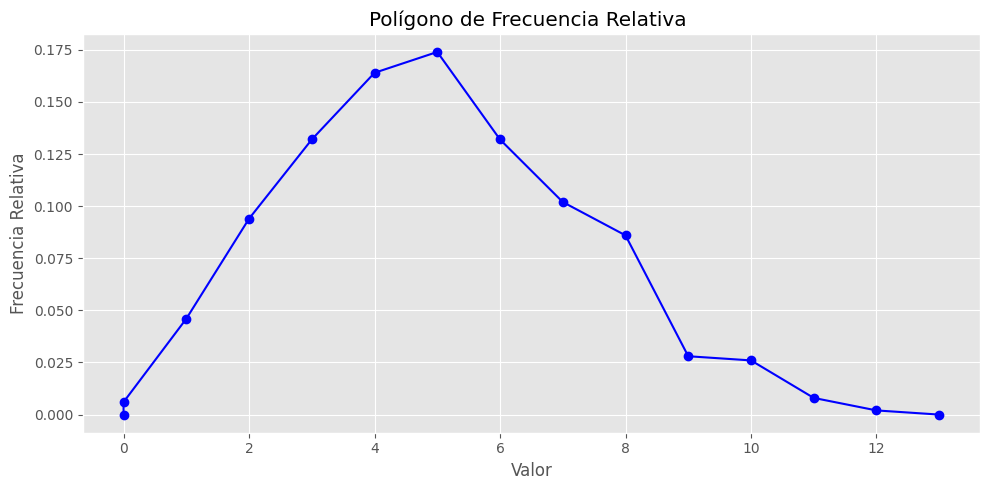

In [36]:

midpoints = tabla.index.values  # Usamos los valores discretos directamente
x_poly = np.concatenate(([0], midpoints, [midpoints[-1] + 1]))
y_poly = np.concatenate(([0], frecuencia_relativa.values, [0]))

plt.figure(figsize=(10, 5))
plt.plot(x_poly, y_poly, marker='o', linestyle='-', color='blue')
plt.xlabel('Valor')
plt.ylabel('Frecuencia Relativa')
plt.title('Polígono de Frecuencia Relativa ')
plt.grid(True)
plt.tight_layout()
plt.show()


 #### 4. Diagrama de pastel (frecuencia relativa)

Muestra que los valores de 4, 5 y 6 libros representan gran parte del total. Otras categorías con menos participación se agrupan como "Otros", lo que ayuda a destacar los valores dominantes.

Conclusión:
La distribución está claramente centrada en un grupo reducido de valores. Esto refuerza la idea de que hay un patrón de lectura común y repetido en la población.

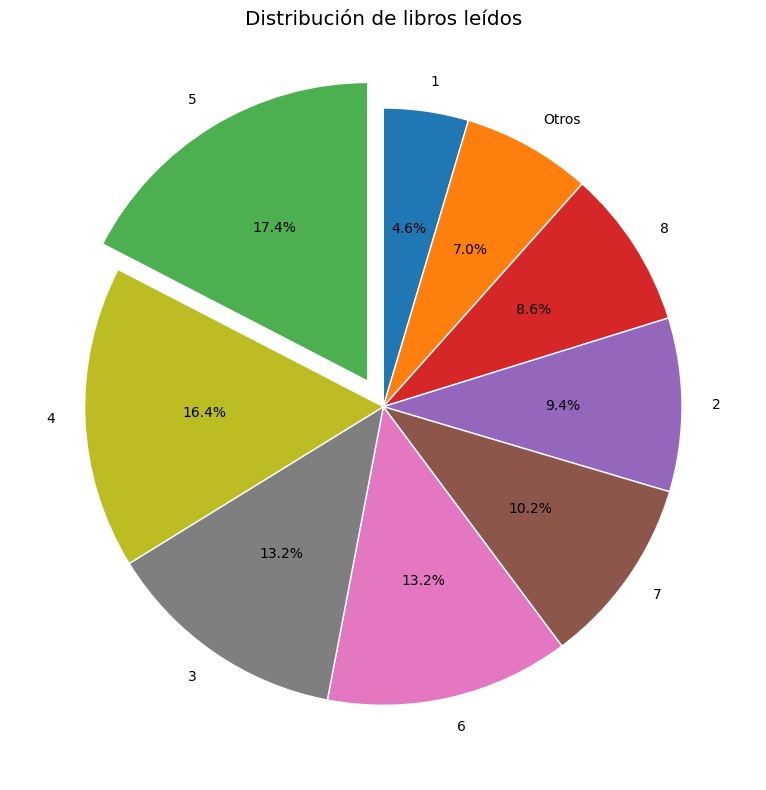

In [5]:
umbral = 0.03  # Agrupar categorías con menos del 3%
otros = frecuencia_relativa[frecuencia_relativa < umbral].sum()
frec_rel_pie = frecuencia_relativa[frecuencia_relativa >= umbral]
frec_rel_pie['Otros'] = otros

# Ordenar de menor a mayor para sentido horario
frec_rel_pie = frec_rel_pie.sort_values(ascending=True)

# Crear lista de colores evitando verdes en la paleta
non_green_colors = [
    '#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', 
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8',
    '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94'
]

# Seleccionar colores de la nueva paleta
colors = non_green_colors[:len(frec_rel_pie)-1]  # Colores para todos excepto el más grande
colors.append('#4CAF50')  # Verde solo para el segmento más grande

plt.figure(figsize=(8, 8))
explode = [0.1 if valor == frec_rel_pie.max() else 0 for valor in frec_rel_pie]
plt.pie(frec_rel_pie, 
        labels=frec_rel_pie.index, 
        autopct=lambda p: f'{p:.1f}%' if p > 2 else '',
        explode=explode, 
        startangle=90,
        counterclock=False,  # Sentido de las manecillas del reloj
        colors=colors,  # Usar nuestra lista personalizada de colores
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title("Distribución de libros leídos")
plt.tight_layout()
plt.show()

#### 5. Ojiva (frecuencia acumulada)
Este gráfico permite ver cuánto se ha acumulado en porcentaje a medida que aumentan los libros leídos. Se observa que aproximadamente el 50% de las personas han leído 5 libros o menos, lo que señala la mediana de la distribución. Además, cerca del 90% ha leído hasta 9 libros.

Conclusión:
La mayoría de la población se concentra en rangos bajos a medios de lectura. Este gráfico es clave para identificar rangos de percentiles y evaluar cómo se acumulan los datos.



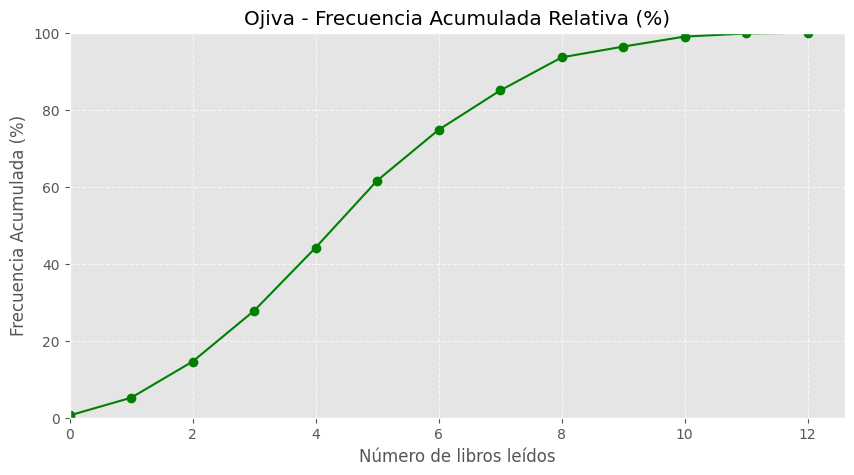

In [8]:
# Ojiva con inicio exacto en (0, 0)
frecuencia_acumulada_pct = frecuencia_acumulada * 100

# Insertar el punto (0, 0)
frecuencia_acumulada_pct_con_0 = np.insert(frecuencia_acumulada_pct.values, 0, 0)
clases_con_0 = np.insert(tabla.index.values, 0, 0)  # Reemplazamos la clase inicial por 0

plt.figure(figsize=(10, 5))
plt.plot(clases_con_0, frecuencia_acumulada_pct_con_0, marker='o', linestyle='-', color='green')
plt.xlabel("Número de libros leídos")
plt.ylabel("Frecuencia Acumulada (%)")
plt.title("Ojiva - Frecuencia Acumulada Relativa (%)")
plt.ylim(0, 100)
plt.xlim(left=0)  # Asegurar que comience desde x=0
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()
